In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('player_records.csv')
df.head()

,H,HP,セーブ,ボーク,三振,勝利,勝率,名前,四球,失点,...,打者,投球回,敗北,暴投,本塁打,死球,無四球,登板,自責点,防御率
0,5,7,17,0,28,2,1.000,Ｒ．デラロサ,16,9,...,132,31.0,0,1,3,3,0,35,9,2.56
1,0,0,0,0,59,8,0.667,Ａ．サンチェス,34,35,...,363,87.0,4,0,8,0,0,15,30,3.08
2,16,17,0,0,16,1,0.333,大竹 寛,9,9,...,100,24.0,2,0,3,1,0,29,7,2.59
3,0,0,0,0,131,14,0.875,菅野 智之,25,33,...,532,137.0,2,2,8,7,0,20,30,1.97
4,0,1,0,0,106,9,0.600,戸郷 翔征,42,33,...,446,107.0,6,1,12,6,0,19,33,2.76


In [3]:
columns_list = [
    '年度', '所属球団', '登板', '勝利', '敗北', 'セーブ', 'H', 'HP',
    '完投', '完封勝', '無四球', '勝率', '打者', '投球回', '安打', '本塁打',
    '四球', '死球', '三振', '暴投', 'ボーク', '失点', '自責点', '防御率', '名前'
]
df = df.loc[:, columns_list]
df.head()

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,...,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前
0,2020,読 売,35,2,0,17,5,7,0,0,...,3,16,3,28,1,0,9,9,2.56,Ｒ．デラロサ
1,2020,読 売,15,8,4,0,0,0,0,0,...,8,34,0,59,0,0,35,30,3.08,Ａ．サンチェス
2,2020,読 売,29,1,2,0,16,17,0,0,...,3,9,1,16,0,0,9,7,2.59,大竹 寛
3,2020,読 売,20,14,2,0,0,0,3,3,...,8,25,7,131,2,0,33,30,1.97,菅野 智之
4,2020,読 売,19,9,6,0,0,1,0,0,...,12,42,6,106,1,0,33,33,2.76,戸郷 翔征


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年度      350 non-null    int64  
 1   所属球団    350 non-null    object 
 2   登板      350 non-null    int64  
 3   勝利      350 non-null    int64  
 4   敗北      350 non-null    int64  
 5   セーブ     350 non-null    int64  
 6   H       350 non-null    int64  
 7   HP      350 non-null    int64  
 8   完投      350 non-null    int64  
 9   完封勝     350 non-null    int64  
 10  無四球     350 non-null    int64  
 11  勝率      350 non-null    float64
 12  打者      350 non-null    int64  
 13  投球回     349 non-null    float64
 14  安打      350 non-null    int64  
 15  本塁打     350 non-null    int64  
 16  四球      350 non-null    int64  
 17  死球      350 non-null    int64  
 18  三振      350 non-null    int64  
 19  暴投      350 non-null    int64  
 20  ボーク     350 non-null    int64  
 21  失点      350 non-null    int64  
 22  自責

In [5]:
df['防御率'] = pd.to_numeric(df['防御率'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年度      350 non-null    int64  
 1   所属球団    350 non-null    object 
 2   登板      350 non-null    int64  
 3   勝利      350 non-null    int64  
 4   敗北      350 non-null    int64  
 5   セーブ     350 non-null    int64  
 6   H       350 non-null    int64  
 7   HP      350 non-null    int64  
 8   完投      350 non-null    int64  
 9   完封勝     350 non-null    int64  
 10  無四球     350 non-null    int64  
 11  勝率      350 non-null    float64
 12  打者      350 non-null    int64  
 13  投球回     349 non-null    float64
 14  安打      350 non-null    int64  
 15  本塁打     350 non-null    int64  
 16  四球      350 non-null    int64  
 17  死球      350 non-null    int64  
 18  三振      350 non-null    int64  
 19  暴投      350 non-null    int64  
 20  ボーク     350 non-null    int64  
 21  失点      350 non-null    int64  
 22  自責

In [6]:
df.dropna(inplace=True)
df.shape

(349, 25)

In [7]:
df['年度'].value_counts()

2020    299
2019     31
2018     13
2017      3
2013      1
2012      1
2009      1
Name: 年度, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [9]:
df = df[df['年度'] == 2020]
data_df = df.drop(columns=['年度', '所属球団', '名前'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)

data = np.array(data_df)
data_scaled = np.array(data_scaled)

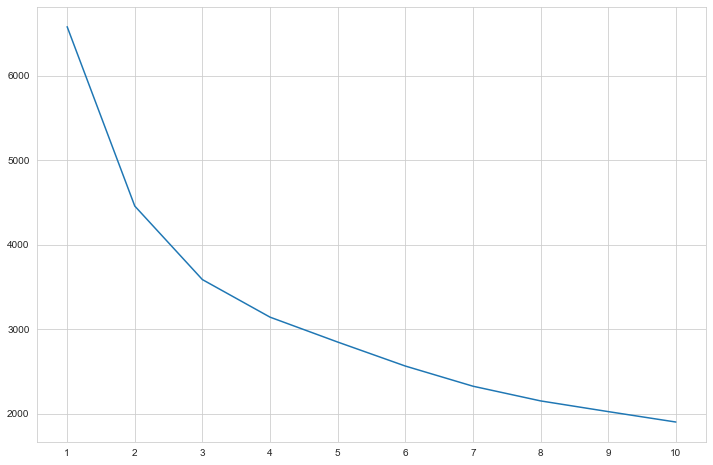

In [10]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.xticks(range(1, 11))
plt.plot(range(1, 11), distortions)

In [11]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
kmeans.fit(data_scaled)
cluster_labels = kmeans.predict(data_scaled)
cluster_labels

array([2, 0, 5, 4, 4, 0, 0, 0, 5, 0, 5, 0, 0, 1, 1, 5, 1, 1, 1, 1, 5, 1,
       1, 1, 1, 1, 5, 1, 4, 0, 5, 0, 1, 1, 0, 1, 1, 1, 1, 1, 4, 1, 5, 4,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 5, 0, 0, 1, 3, 0, 1, 1, 5, 5, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 5, 5, 4, 2, 5, 0, 0, 0, 0,
       5, 1, 1, 1, 1, 1, 1, 1, 0, 5, 1, 5, 1, 1, 4, 0, 1, 4, 0, 1, 0, 1,
       0, 5, 1, 5, 5, 1, 5, 1, 1, 1, 1, 4, 0, 1, 2, 1, 2, 0, 1, 1, 5, 5,
       0, 0, 1, 0, 4, 0, 5, 5, 0, 1, 0, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       4, 1, 1, 0, 5, 4, 1, 5, 0, 2, 1, 1, 4, 1, 1, 1, 5, 5, 1, 1, 1, 0,
       1, 4, 4, 0, 4, 5, 5, 1, 1, 1, 1, 1, 1, 5, 1, 5, 4, 4, 1, 0, 2, 1,
       1, 1, 1, 0, 4, 2, 5, 4, 0, 1, 0, 1, 5, 5, 1, 5, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 4, 1, 5, 0, 0, 1, 4, 4, 0, 5, 5, 0, 5, 1, 2, 1, 5, 1, 1,
       1, 0, 0, 1, 5, 1, 1, 0, 0, 1, 0, 1, 5, 0, 1, 1, 5, 1, 4, 2, 1, 1,
       1, 1, 5, 0, 1, 1, 0, 1, 1, 1, 1, 4, 0, 1, 1, 5, 1, 4, 1, 2, 1, 1,
       1, 1, 1, 1, 5, 5, 1, 0, 1, 5, 0, 1, 0])

In [23]:
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', None)

df['cluster'] = cluster_labels
df.head()

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
0,2020,読 売,35,2,0,17,5,7,0,0,0,1.000,132,31.0,23,3,16,3,28,1,0,9,9,2.56,Ｒ．デラロサ,2
1,2020,読 売,15,8,4,0,0,0,0,0,0,0.667,363,87.0,74,8,34,0,59,0,0,35,30,3.08,Ａ．サンチェス,0
2,2020,読 売,29,1,2,0,16,17,0,0,0,0.333,100,24.0,20,3,9,1,16,0,0,9,7,2.59,大竹 寛,5
3,2020,読 売,20,14,2,0,0,0,3,3,0,0.875,532,137.0,97,8,25,7,131,2,0,33,30,1.97,菅野 智之,4
4,2020,読 売,19,9,6,0,0,1,0,0,0,0.600,446,107.0,87,12,42,6,106,1,0,33,33,2.76,戸郷 翔征,4


In [24]:
df[df['cluster'] == 0]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
1,2020,読 売,15,8,4,0,0,0,0,0,0,0.667,363,87.0,74,8,34,0,59,0,0,35,30,3.08,Ａ．サンチェス,0
5,2020,横浜DeNA,17,6,7,0,0,0,1,0,0,0.462,384,89.0,98,10,26,1,69,2,0,41,39,3.94,井納 翔一,0
7,2020,読 売,12,5,2,0,0,0,0,0,0,0.714,260,62.0,53,8,21,2,55,0,0,23,22,3.16,今村 信貴,0
8,2020,読 売,26,5,7,1,2,2,0,0,0,0.417,379,89.0,91,10,26,5,58,2,0,48,46,4.63,田口 麗斗,0
10,2020,読 売,24,2,4,0,4,4,0,0,0,0.333,281,63.0,68,15,21,5,43,0,0,37,35,4.95,桜井 俊貴,0
12,2020,読 売,11,4,4,0,0,0,0,0,0,0.500,243,58.0,53,5,19,2,45,0,1,20,20,3.10,Ｃ．Ｃ．メルセデス,0
13,2020,読 売,12,4,4,0,0,0,1,1,0,0.500,265,65.0,47,5,23,4,49,1,0,22,21,2.88,畠 世周,0
32,2020,阪 神,38,7,3,0,8,13,0,0,0,0.700,298,71.0,67,7,23,0,63,3,0,32,26,3.30,岩貞 祐太,0
34,2020,阪 神,24,1,6,0,7,7,0,0,0,0.143,341,76.0,71,5,40,2,85,4,0,47,34,4.01,藤浪 晋太郎,0
38,2020,阪 神,12,5,4,0,0,0,1,0,1,0.556,306,76.0,67,4,17,1,75,1,0,25,21,2.49,髙橋 遥人,0


In [25]:
df[df['cluster'] == 1]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
14,2020,読 売,8,1,3,0,2,2,0,0,0,0.250,101,23.0,22,2,12,0,23,3,0,12,11,4.30,髙橋 優貴,1
15,2020,読 売,27,0,1,0,2,2,0,0,0,0.000,118,24.0,27,3,17,2,29,1,0,9,9,3.28,Ｔ．ビエイラ,1
18,2020,読 売,17,0,1,1,4,4,0,0,0,0.000,49,12.0,11,1,2,0,12,2,0,5,5,3.65,高木 京介,1
19,2020,読 売,31,1,1,0,1,2,0,0,0,0.500,133,27.0,32,4,18,3,21,0,0,19,15,4.88,田中 豊樹,1
20,2020,読 売,2,0,0,0,0,0,0,0,0,0.000,20,5.0,4,1,1,0,2,0,0,1,1,1.59,横川 凱,1
21,2020,読 売,5,0,0,0,0,0,0,0,0,0.000,26,4.0,12,1,1,0,4,1,0,6,6,11.57,古川 侑利,1
23,2020,読 売,5,0,0,0,0,0,0,0,0,0.000,23,4.0,6,1,4,0,3,1,0,5,5,10.38,沼田 翔平,1
24,2020,読 売,12,0,0,0,1,1,0,0,0,0.000,62,12.0,16,2,8,0,11,0,0,13,11,7.82,堀岡 隼人,1
25,2020,読 売,1,0,0,0,0,0,0,0,0,0.000,3,0.0,0,0,1,0,0,0,0,0,0,0.00,増田 大輝,1
26,2020,読 売,5,1,0,0,0,1,0,0,0,1.000,32,7.0,6,0,5,1,6,0,0,5,5,6.43,鍬原 拓也,1


In [26]:
df[df['cluster'] == 2]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
0,2020,読 売,35,2,0,17,5,7,0,0,0,1.000,132,31.0,23,3,16,3,28,1,0,9,9,2.56,Ｒ．デラロサ,2
53,2020,阪 神,51,3,1,25,8,11,0,0,0,0.750,208,52.0,36,2,19,0,50,2,0,15,13,2.24,Ｒ．スアレス,2
86,2020,中 日,40,2,0,21,7,9,0,0,0,1.000,155,40.0,24,2,12,1,49,2,0,5,5,1.13,Ｒ．マルティネス,2
94,2020,横浜DeNA,48,3,1,18,5,8,0,0,0,0.750,180,47.0,30,1,13,1,46,1,0,13,13,2.45,三嶋 一輝,2
143,2020,広島東洋,53,2,3,19,7,9,0,0,0,0.400,217,55.0,39,7,17,1,62,1,0,18,15,2.45,Ｇ．フランスア,2
146,2020,東京ヤクルト,44,3,2,20,4,7,0,0,0,0.600,186,44.0,42,2,11,1,58,2,0,10,10,2.01,石山 泰稚,2
189,2020,福岡ソフトバンク,52,1,1,32,6,7,0,0,0,0.500,205,51.0,39,4,13,2,40,0,0,14,13,2.28,森 唯斗,2
227,2020,千葉ロッテ,54,3,5,31,5,8,0,0,0,0.375,214,52.0,42,1,17,2,53,4,0,15,13,2.25,益田 直也,2
234,2020,埼玉西武,48,5,0,33,1,6,0,0,0,1.000,196,49.0,41,3,10,2,42,0,0,11,11,2.02,増田 達至,2
275,2020,東北楽天,46,1,4,18,13,14,0,0,0,0.200,195,44.0,46,2,18,1,32,4,0,16,14,2.86,Ａ．ブセニッツ,2


In [27]:
df[df['cluster'] == 3]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
67,2020,中 日,20,11,6,0,0,0,10,6,2,0.647,559,148.0,106,13,23,0,148,3,0,33,30,1.82,大野 雄大,3


In [28]:
df[df['cluster'] == 4]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
3,2020,読 売,20,14,2,0,0,0,3,3,0,0.875,532,137.0,97,8,25,7,131,2,0,33,30,1.97,菅野 智之,4
4,2020,読 売,19,9,6,0,0,1,0,0,0,0.600,446,107.0,87,12,42,6,106,1,0,33,33,2.76,戸郷 翔征,4
31,2020,阪 神,21,11,5,0,0,0,4,2,2,0.688,582,147.0,116,15,28,4,115,1,1,44,37,2.26,西 勇輝,4
44,2020,阪 神,18,11,3,0,0,0,2,0,1,0.786,435,112.0,97,17,12,0,64,2,0,45,36,2.89,秋山 拓巳,4
47,2020,阪 神,21,7,9,0,0,0,1,0,0,0.438,510,120.0,111,4,44,5,88,2,0,51,45,3.36,青柳 晃洋,4
93,2020,横浜DeNA,19,10,6,0,0,0,1,0,1,0.625,452,113.0,96,13,29,3,81,0,1,34,32,2.53,大貫 晋一,4
117,2020,広島東洋,20,8,6,0,0,0,2,1,0,0.571,544,130.0,116,11,44,0,106,4,0,46,43,2.96,九里 亜蓮,4
121,2020,広島東洋,18,10,3,0,0,0,2,1,1,0.769,485,122.0,102,6,32,4,124,2,0,30,26,1.91,森下 暢仁,4
140,2020,広島東洋,19,5,6,0,0,0,2,0,1,0.455,464,107.0,90,13,52,4,97,2,1,53,46,3.87,遠藤 淳志,4
156,2020,東京ヤクルト,20,10,8,0,0,0,1,1,0,0.556,515,119.0,132,20,29,2,83,2,0,64,61,4.61,小川 泰弘,4


In [29]:
df[df['cluster'] == 5]

,年度,所属球団,登板,勝利,敗北,セーブ,H,HP,完投,完封勝,無四球,勝率,打者,投球回,安打,本塁打,四球,死球,三振,暴投,ボーク,失点,自責点,防御率,名前,cluster
2,2020,読 売,29,1,2,0,16,17,0,0,0,0.333,100,24.0,20,3,9,1,16,0,0,9,7,2.59,大竹 寛,5
9,2020,読 売,46,3,1,0,13,16,0,0,0,0.750,148,37.0,25,2,13,1,40,0,0,12,12,2.89,鍵谷 陽平,5
11,2020,読 売,37,2,1,6,15,17,0,0,0,0.667,139,36.0,24,1,10,1,26,0,0,4,4,1.00,中川 皓太,5
17,2020,読 売,44,1,1,2,21,22,0,0,0,0.500,141,37.0,17,2,13,6,37,1,1,10,8,1.93,高梨 雄平,5
22,2020,読 売,43,3,0,0,9,12,0,0,0,1.000,156,37.0,21,5,22,5,30,0,0,15,13,3.11,大江 竜聖,5
29,2020,阪 神,41,5,2,2,17,22,0,0,0,0.714,163,39.0,26,2,15,2,37,3,0,9,8,1.82,岩崎 優,5
33,2020,阪 神,32,2,1,0,9,11,0,0,0,0.667,136,30.0,28,1,16,1,27,4,0,12,7,2.08,馬場 皐輔,5
46,2020,阪 神,28,2,4,0,11,13,0,0,0,0.333,232,56.0,54,6,13,3,39,0,0,21,20,3.18,Ｊ．ガンケル,5
62,2020,中 日,36,1,3,0,13,14,0,0,0,0.250,122,30.0,20,3,13,0,21,1,0,13,12,3.60,谷元 圭介,5
63,2020,中 日,26,4,0,0,7,11,0,0,0,1.000,105,26.0,22,2,8,1,18,0,0,8,8,2.77,又吉 克樹,5


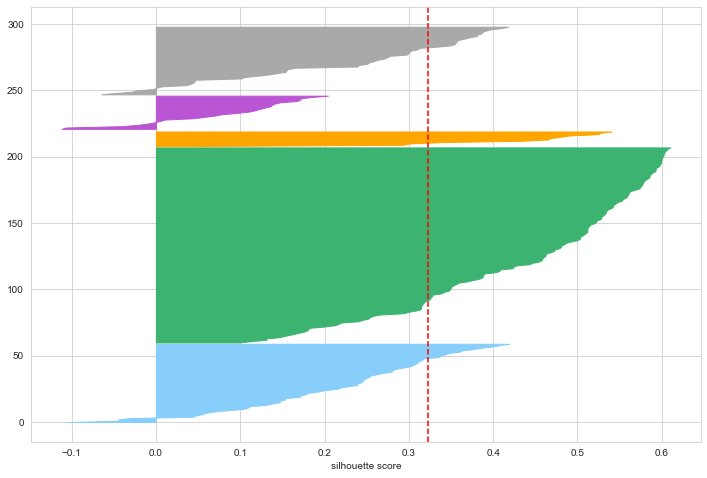

In [30]:
silhouette_avg = silhouette_score(data_scaled, cluster_labels)

silhouette_scores = silhouette_samples(data_scaled,
                                       cluster_labels, 
                                       metric='euclidean')

colorlist = ['#87cefa', '#3cb371', '#ffa500', '#dc143c', 
             '#ba55d3', '#a9a9a9', '#d8bfd8']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

y_lower = 0

for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_scores[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    y_upper = y_lower + ith_cluster_silhouette_values.shape[0]

    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0,
                     ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color)

    y_lower = y_upper 

ax.set_xlabel('silhouette score')

# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color='red', ls='--')